<a href="https://colab.research.google.com/github/msiddhesh/A_Real_Estate_price_Prediction_Project/blob/main/Copy_of_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Distance 0 hojarhi h unme precesion lana h distance me

In [ ]:
with open("/content/drive/MyDrive/Project DataSets/DDML/docword.enron.txt","r") as f1:
    content = f1.readlines()
Enron_details = [int(content[i]) for i in range(3)]
Enron = {}
for i in range(3,len(content)):
     Spilit = list(map(int,content[i].split(" ")))
     if Spilit[0] in Enron.keys():
          Enron[Spilit[0]][Spilit[1]] = True
     else:
          Enron[Spilit[0]] = {}
          Enron[Spilit[0]][Spilit[1]] = True

In [ ]:
with open("/content/drive/MyDrive/Project DataSets/DDML/docword.nips.txt","r") as f1:
    content = f1.readlines()
Nips_details = [int(content[i]) for i in range(3)]
Nips = {}
for i in range(3,len(content)):
     Spilit = list(map(int,content[i].split(" ")))
     if Spilit[0] in Nips.keys():
          Nips[Spilit[0]][Spilit[1]] = True
     else:
          Nips[Spilit[0]] = {}
          Nips[Spilit[0]][Spilit[1]] = True

In [ ]:
with open("/content/drive/MyDrive/Project DataSets/DDML/docword.kos.txt","r") as f1:
    content = f1.readlines()
Kos_details = [int(content[i]) for i in range(3)]
Kos = {}
for i in range(3,len(content)):
     Spilit = list(map(int,content[i].split(" ")))
     if Spilit[0] in Kos.keys():
          Kos[Spilit[0]][Spilit[1]] = True
     else:
          Kos[Spilit[0]] = {}
          Kos[Spilit[0]][Spilit[1]] = True

In [ ]:
Enron_details,Nips_details,Kos_details

([39861, 28102, 3710420], [1500, 12419, 746316], [3430, 6906, 353160])

In [ ]:
# def Normal_distance(document1_id,document2_id):
#     Union = dict(Enron[document1_id]|Enron[document2_id])
#     Intersection_keys = Enron[document1_id].keys()&Enron[document2_id].keys()
#     Intersection = {}
#     for i in Intersection_keys:
#         Intersection[i] = min(Enron[document1_id][i],Enron[document2_id][i])
#     for i in Intersection_keys:
#         Union[i] = max(Enron[document1_id][i],Enron[document2_id][i])
#     Intersection_Sum = sum(Intersection.values())
#     Union_sum = sum(Union.values())
#     distance = (Union_sum - Intersection_Sum)/Union_sum
#     return (distance,Union_sum,Intersection_Sum)

In [ ]:
# def distance_all():
#     for i in range(1,Enron_details[0]+1):
#         for j in range(i,Enron_details[0]+1):
#             union_sum = len(Enron[i].keys()|Enron[j].keys())
#             intersection_sum = len(Enron[i].keys()&Enron[j].keys())
#             distance = 1- (intersection_sum/union_sum)
#             Enron_distacnce[i][j] = distance
#             # Enron_distacnce[j][i] = distance

In [ ]:
def Updated_Clusters(arr):
    grouped_indices = {}
    for idx, val in np.ndenumerate(arr):
        if val not in grouped_indices:
            grouped_indices[val] = [idx[0]+1]  # Keep the original index
        else:
            grouped_indices[val].append(idx[0]+1)
    # print(grouped_indices)
    return grouped_indices
def New_cluster(my_list):
    from collections import Counter
    counter = Counter()
    total=0
    our_list = []
    for i in my_list:
        our_list += [Enron[i]]
    for d in our_list:
        counter.update(d.keys())
        total+=len(d.keys())
    # unique_keys = len(set().union(*[d.keys() for d in our_list]))
    # print(total,unique_keys)
    # threshold = 5*total / unique_keys
    # print(total,threshold)
    # print(counter.items())
    most_common_keys = [key for key, count in counter.items() if count/len(my_list) >0.09  and count>2]
    # print(most_common_keys)
    result_dict = {key: True for key in most_common_keys}
    return result_dict
def Enron_distacnce(Centers,i,j):
    union_sum = len(Centers[i].keys()|Enron[j].keys())
    intersection_sum = len(Centers[i].keys()&Enron[j].keys())
    return 1- (intersection_sum/union_sum)
def Intertia(Centers,Center_Distances):
    intertia = 0
    for i in range(1,len(Center_Distances)):
        intertia += Enron_distacnce(Centers,int(Center_Distances[i]),i)
    return intertia
def Enron_Cluster_distacnce(D,i,j):
    union_sum = len(D[i].keys()|Enron[j].keys())
    intersection_sum = len(D[i].keys()&Enron[j].keys())
    return (intersection_sum,union_sum)
def find_mini_Enron_distacnce_cluster(Centers,k,j):
    # mini_list = np.ones(k,dtype="float64")
    mini_list_1 = Enron_Cluster_distacnce(Centers,1,j)
    clt = 1
    for i in range(1,k):
        mini_list_2  = Enron_Cluster_distacnce(Centers,i+1,j)
        if mini_list_2[0]*mini_list_1[1]>mini_list_2[1]*mini_list_1[0]:
            clt= i+1
    return clt

In [ ]:
def KMeans(k=5):
    Centers = {}
    for i in range(k):
        center = np.random.randint(1,Enron_details[0]+1)
        Centers[i+1] = Enron[center]
    Inter = []
    Center_Distances = np.full((Enron_details[0]+1),dtype="float",fill_value=None)
    for j in range(1,Enron_details[0]+1):
            Center_Distances[j] = find_mini_Enron_distacnce_cluster(Centers,k,j)
            # print(j,Center_Distances[j])
    last_minimum = float('inf')

    for intater in range(20):
        # return Center_Distances
        # print(Center_Distances)
        Updated_Clusters_dictionary = Updated_Clusters(Center_Distances[1:])
        # print(Updated_Clusters_dictionary)
        for i in range(k):
            # print(Updated_Clusters_dictionary[i+1])
            Centers[i+1] = New_cluster(Updated_Clusters_dictionary[i+1])
        # print(Centers)
        print(intater)
        for j in range(1,Enron_details[0]+1):
            Center_Distances[j] = find_mini_Enron_distacnce_cluster(Centers,k,j)
        current_cluster = Intertia(Centers,Center_Distances)
        if current_cluster < last_minimum:
            last_minimum = current_cluster
            minimum_cluster = Updated_Clusters_dictionary
        Inter.append(current_cluster)
        # print(Inter)
        # print(Center_Distances[1:].sum())
    return Inter,minimum_cluster,last_minimum

inf

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


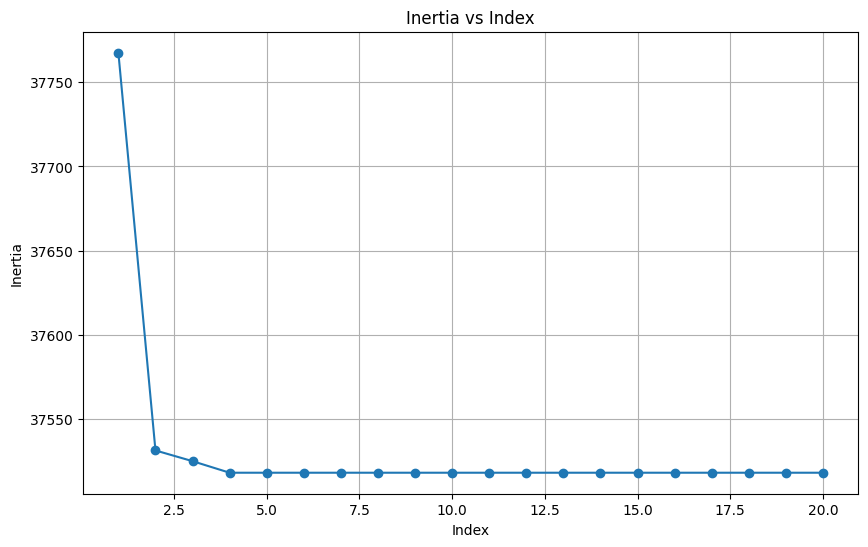

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


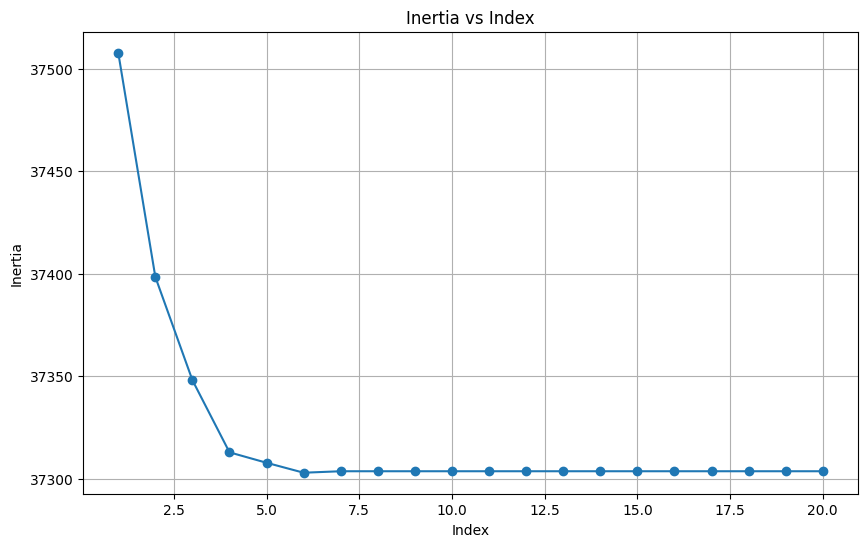

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


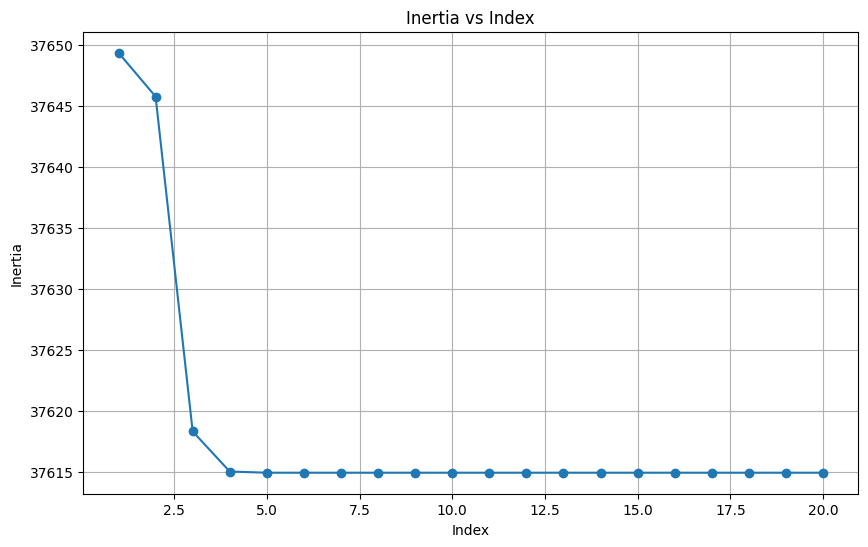

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


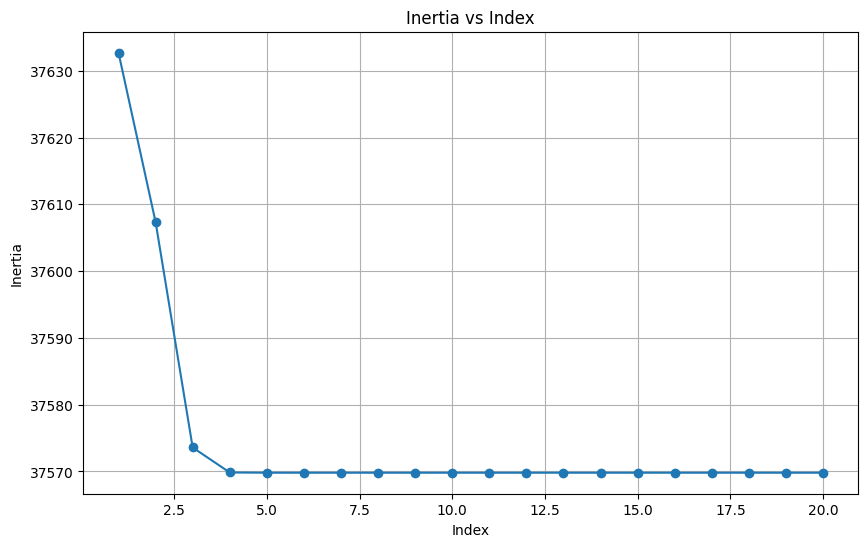

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


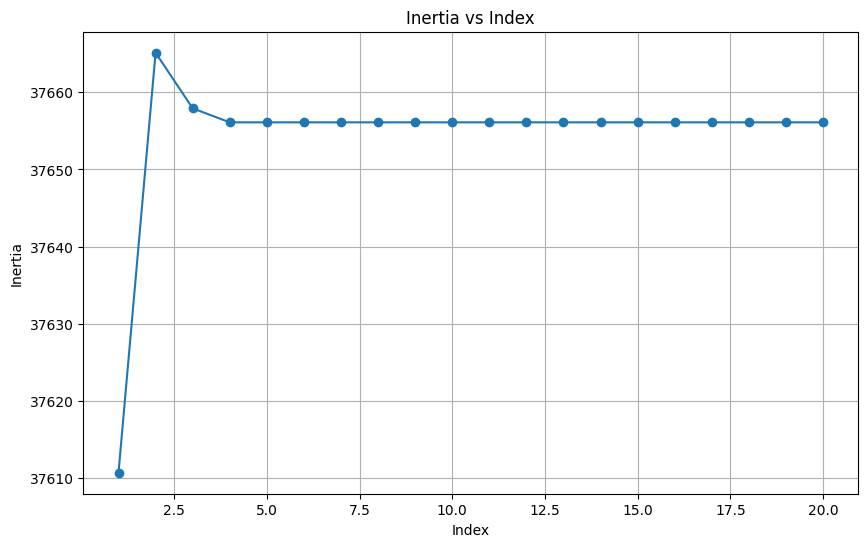

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


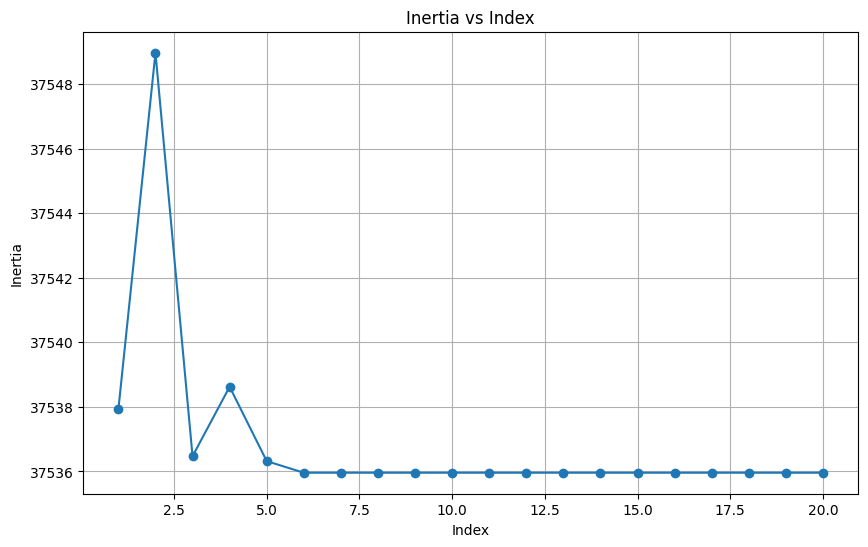

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


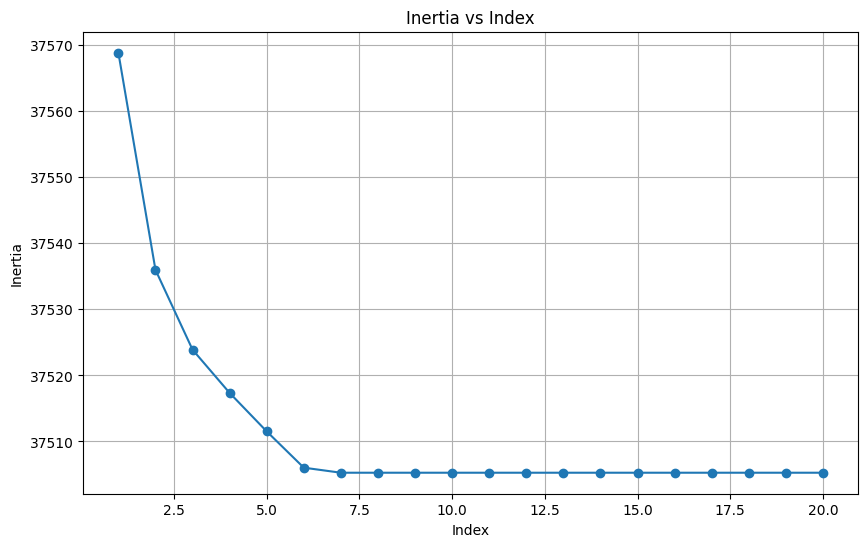

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


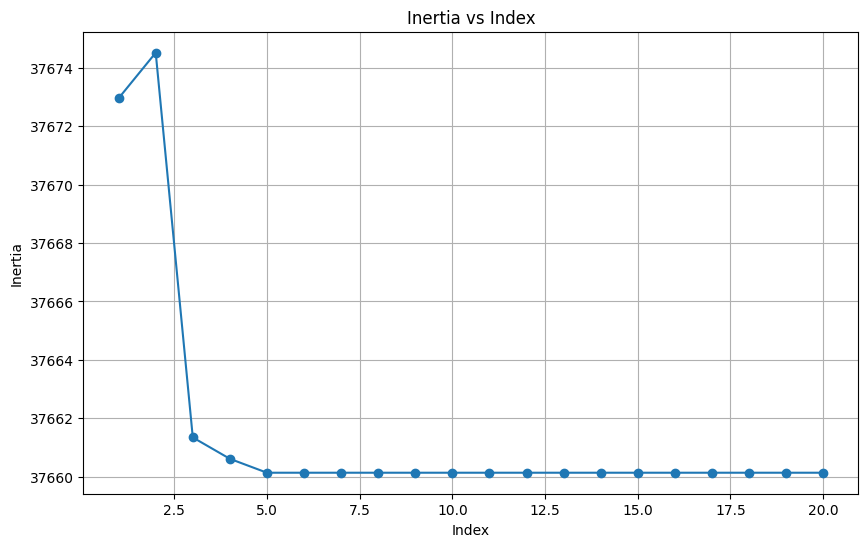

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


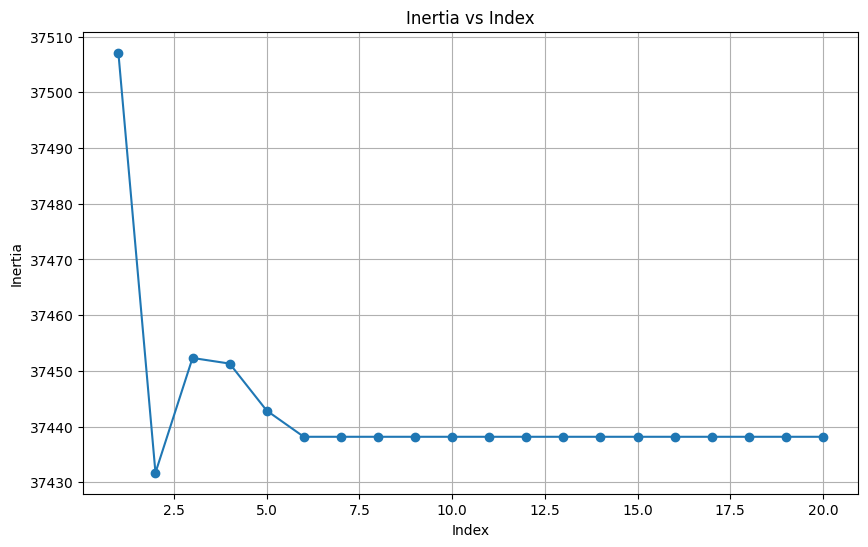

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


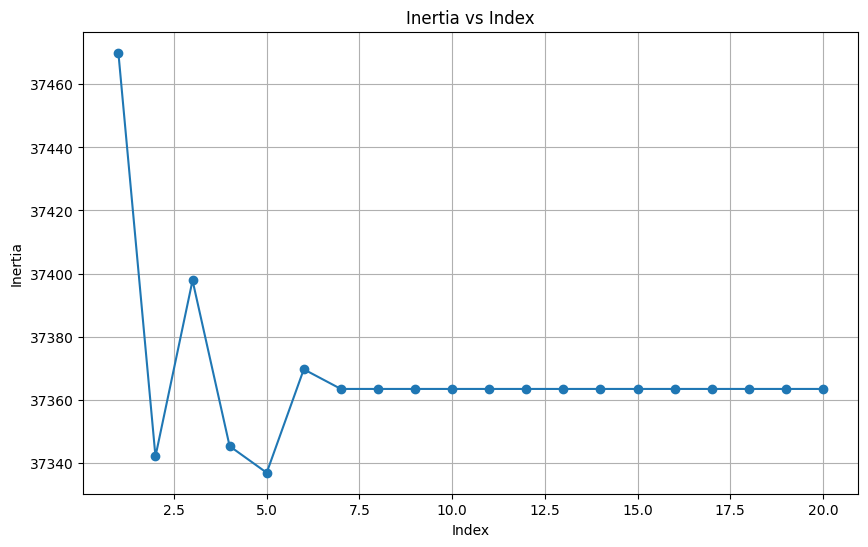

In [ ]:
okay = [ ]
for _ in range(10):
    inertia_values  = KMeans()
    okay.append(inertia_values)
    index_values = np.arange(1, len(inertia_values[0]) + 1)
    import numpy as np
    import matplotlib.pyplot as plt

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(index_values, inertia_values[0], marker='o', linestyle='-')
    plt.title('Inertia vs Index')
    plt.xlabel('Index')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

In [ ]:
okay

NameError: name 'okay' is not defined

In [ ]:
float('inf')

In [ ]:
print('fgjf')

[37477.214858809515,
 37400.0443060374,
 37382.3434680076,
 37344.159895268356,
 37323.88266008135,
 37323.4877460578,
 37323.19303690159,
 37323.19303690159,
 37323.19303690159,
 37323.19303690159,
 37323.19303690159,
 37323.19303690159,
 37323.19303690159,
 37323.19303690159,
 37323.19303690159,
 37323.19303690159,
 37323.19303690159,
 37323.19303690159,
 37323.19303690159,
 37323.19303690159]

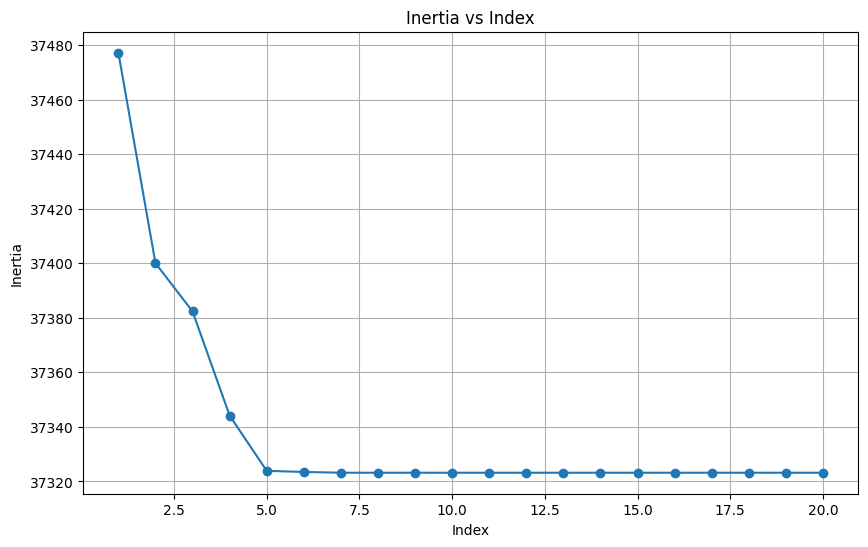

In [ ]:
# index_values = np.arange(1, len(inertia_values) + 1)
# import numpy as np
# import matplotlib.pyplot as plt

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(index_values, inertia_values, marker='o', linestyle='-')
# plt.title('Inertia vs Index')
# plt.xlabel('Index')
# plt.ylabel('Inertia')
# plt.grid(True)
# plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
K=1


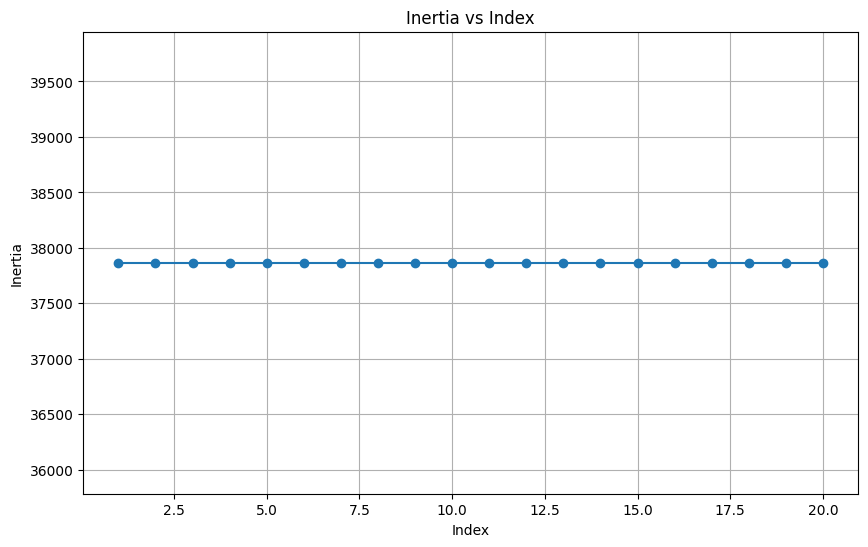

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
K=2


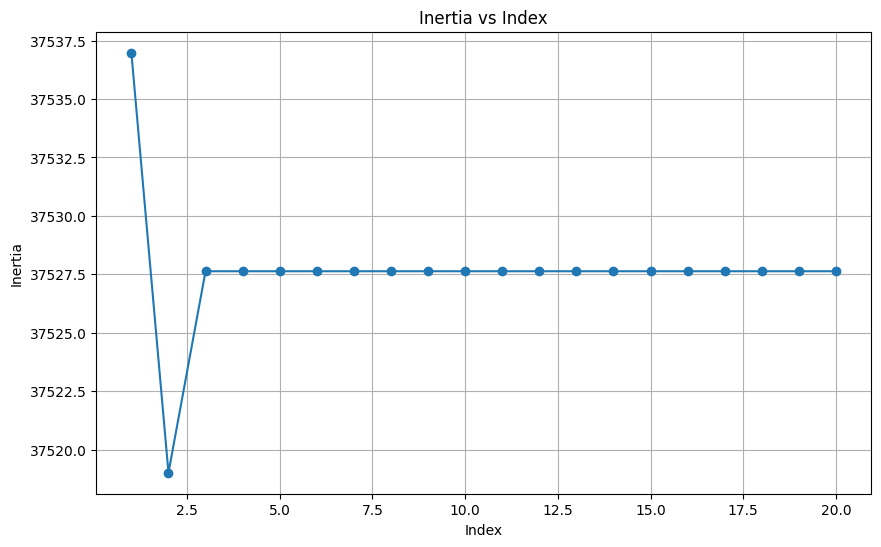

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
K=3


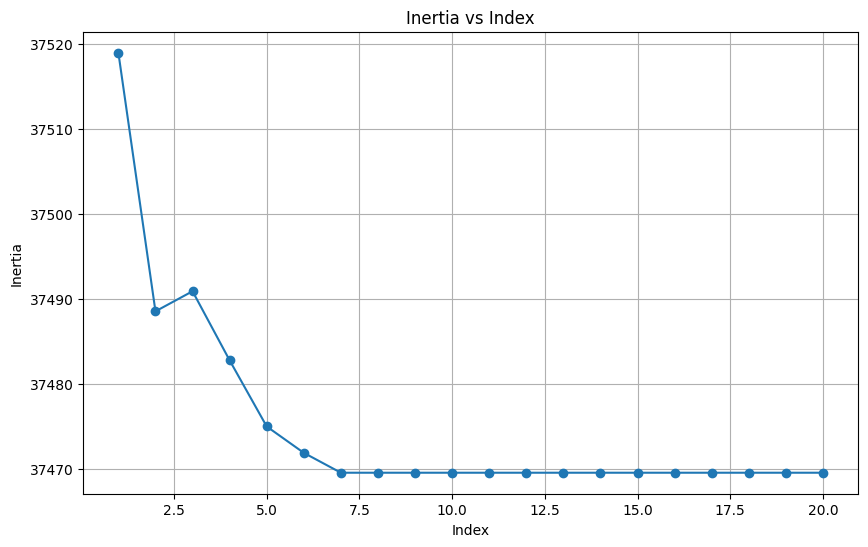

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
K=4


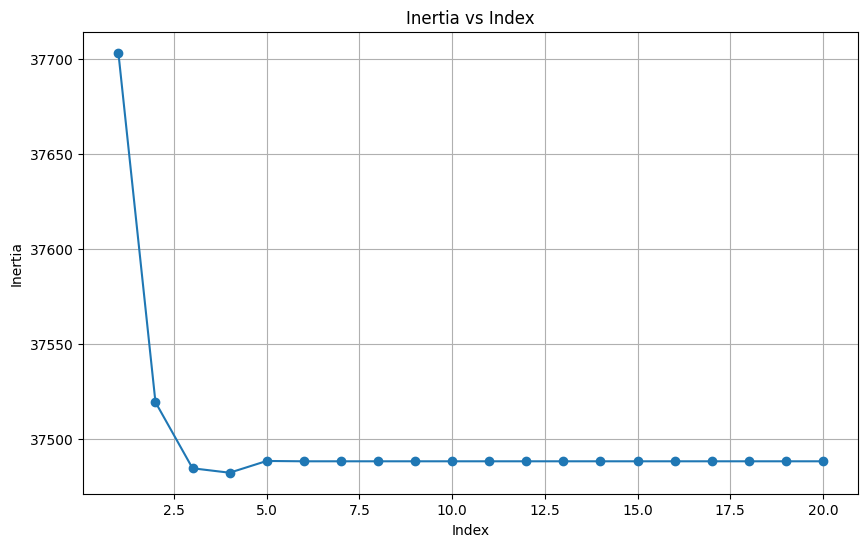

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
K=5


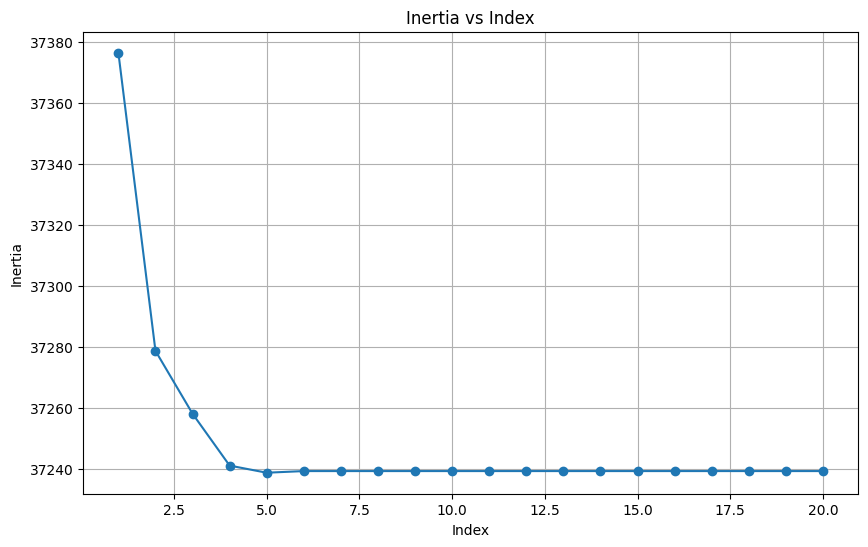

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
K=6


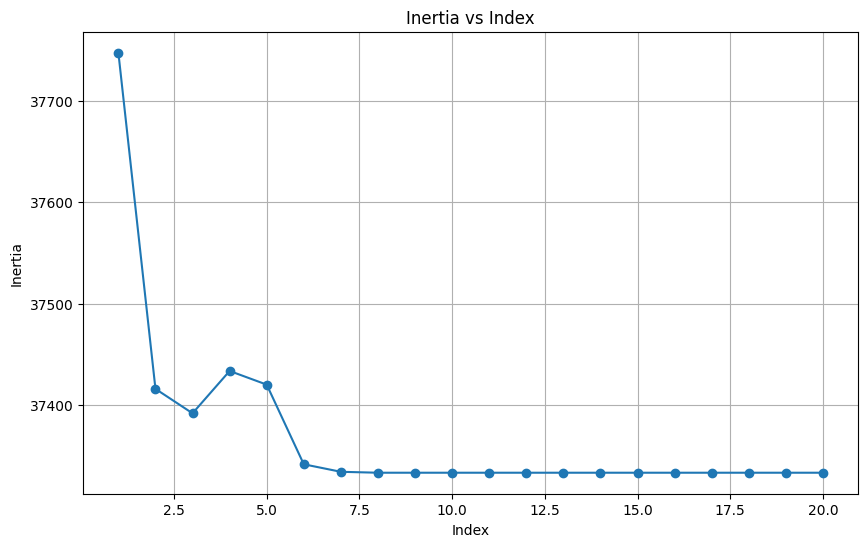

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
K=7


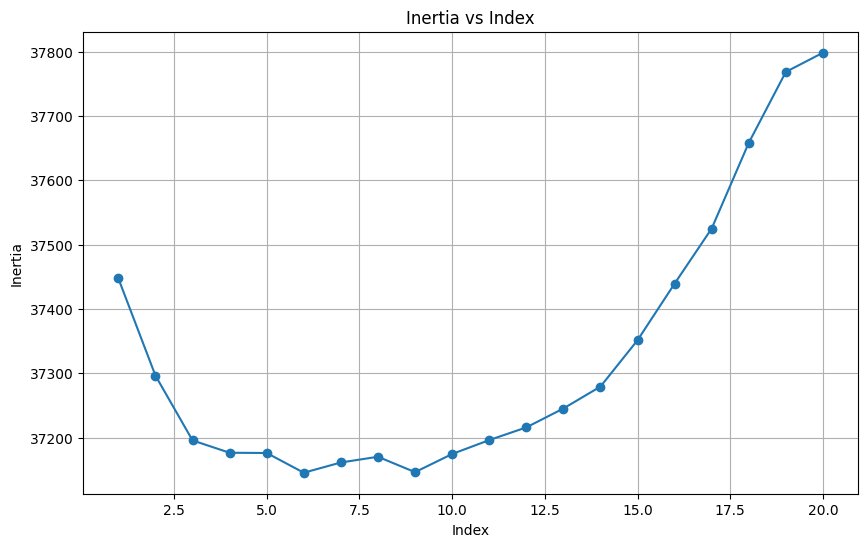

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
K=8


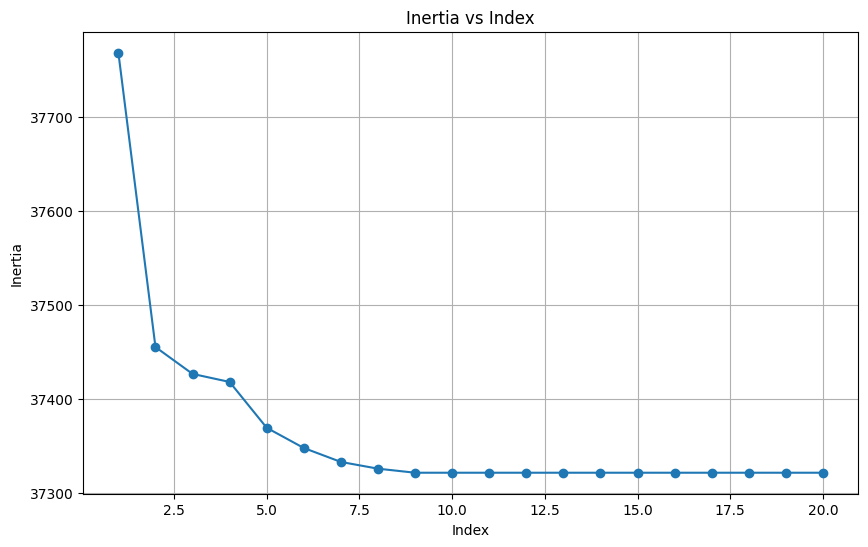

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
K=9


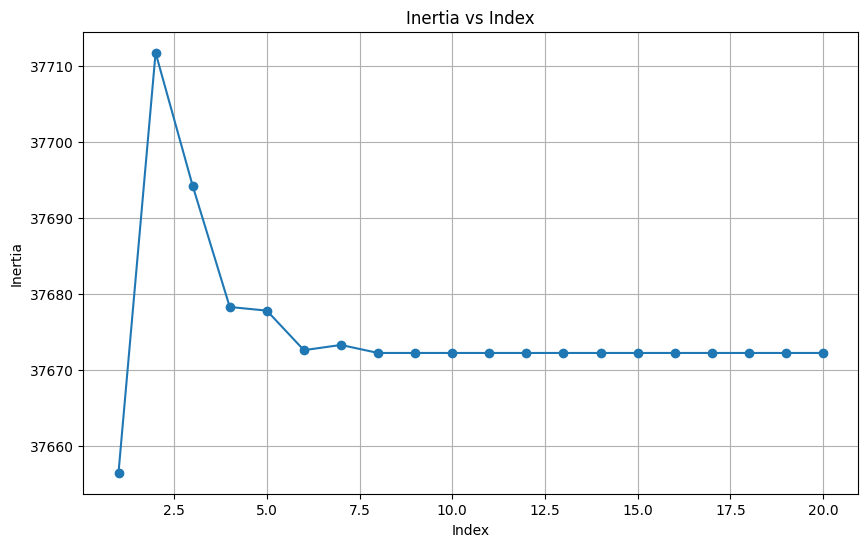

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
K=10


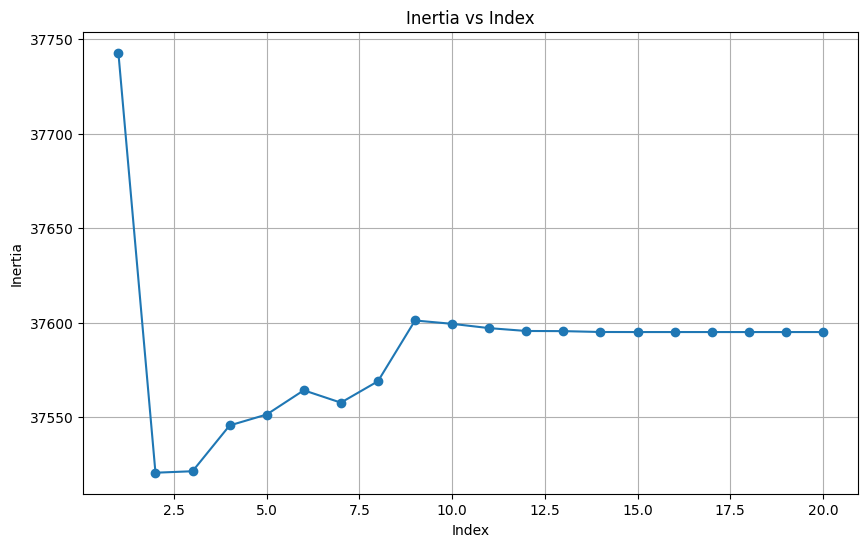

In [ ]:
# for _ in range(10):
#     inertia_values  = KMeans(_ +1 )
#     index_values = np.arange(1, len(inertia_values) + 1)
#     import numpy as np
#     import matplotlib.pyplot as plt

#     # Plotting
#     print("K="+str(_ +1) )
#     plt.figure(figsize=(10, 6))
#     plt.plot(index_values, inertia_values, marker='o', linestyle='-')
#     plt.title('Inertia vs Index')
#     plt.xlabel('Index')
#     plt.ylabel('Inertia')
#     plt.grid(True)
#     plt.show()

In [ ]:
inertia_values

[37865.97371387918,
 37865.97371387918,
 37865.97371387918,
 37865.97371387918,
 37865.97371387918,
 37865.97371387918,
 37865.97371387918,
 37865.97371387918,
 37865.97371387918,
 37865.97371387918,
 37865.97371387918,
 37865.97371387918,
 37865.97371387918,
 37865.97371387918,
 37865.97371387918,
 37865.97371387918,
 37865.97371387918,
 37865.97371387918,
 37865.97371387918,
 37865.97371387918]

In [ ]:
def Intertia(Centers,Center_Distances):
    intertia = 0
    for i in range(1,len(Center_Distances)):
        intertia += Enron_distacnce(Centers,int(Center_Distances[i]),i)
    return intertia


In [ ]:
# def Enron_distacnce(Centers,i,j):
#     union_sum = len(Centers[i].keys()|Enron[j].keys())
#     intersection_sum = len(Centers[i].keys()&Enron[j].keys())
#     return 1- (intersection_sum/union_sum)


In [ ]:
# def Enron_Cluster_distacnce(D,i,j):
#     union_sum = len(D[i].keys()|Enron[j].keys())
#     intersection_sum = len(D[i].keys()&Enron[j].keys())
#     return (intersection_sum,union_sum)

In [ ]:
# def find_mini_Enron_distacnce_cluster(Centers,k,j):
#     # mini_list = np.ones(k,dtype="float64")
#     mini_list_1 = Enron_Cluster_distacnce(Centers,1,j)
#     clt = 1
#     for i in range(1,k):
#         mini_list_2  = Enron_Cluster_distacnce(Centers,i+1,j)
#         if mini_list_2[0]*mini_list_1[1]>mini_list_2[1]*mini_list_1[0]:
#             clt= i+1
#     return clt

In [ ]:
# yo = np.ones((10),dtype="float64")
# yo[5] =.1
# # argmin(yo),
# yo.argmin()

5

In [ ]:
# from decimal import Decimal, getcontext

# def Enron_Cluster_distacnce(D, i, j):
#     union_sum = len(D[i].keys() | Enron[j].keys())
#     intersection_sum = len(D[i].keys() & Enron[j].keys())
#     getcontext().prec = 10
#     return Decimal(str(1 - (intersection_sum / union_sum)))

# def find_mini_Enron_distacnce_cluster(Centers, k, j):
#     mini_list = []
#     for i in range(k):
#         mini_list.append(Enron_Cluster_distacnce(Centers, i + 1, j))

#     # Find the minimum distance with the specified precision
#     min_distance = min(mini_list)
#     min_index = [i + 1 for i, v in enumerate(mini_list) if v == min_distance]

#     return min_index[0]

{1: [1, 4], 2: [2, 7, 8], 3: [3, 5, 6, 9]}


In [ ]:
# def Updated_Clusters(arr):
#     grouped_indices = {}
#     for idx, val in np.ndenumerate(arr):
#         if val not in grouped_indices:
#             grouped_indices[val] = [idx[0]+1]  # Keep the original index
#         else:
#             grouped_indices[val].append(idx[0]+1)
#     # print(grouped_indices)
#     return grouped_indices

In [ ]:
# def Updated_Clusters(arr):
#     grouped_indices = {}
#     for idx, val in np.ndenumerate(arr):
#         if val not in grouped_indices:
#             grouped_indices[val] = [idx[0]+1]  # Keep the original index
#         else:
#             grouped_indices[val].append(idx[0]+1)
#     # print(grouped_indices)
#     return grouped_indices
# def New_cluster(my_list):
#     from collections import Counter
#     counter = Counter()
#     total=0
#     our_list = []
#     for i in my_list:
#         our_list += [Enron[i]]
#     for d in our_list:
#         counter.update(d.keys())
#         total+=len(d.keys())
#     # unique_keys = len(set().union(*[d.keys() for d in our_list]))
#     # print(total,unique_keys)
#     # threshold = 5*total / unique_keys
#     # print(total,threshold)
#     # print(counter.items())
#     most_common_keys = [key for key, count in counter.items() if count/len(my_list) >0.09  and count>2]
#     # print(most_common_keys)
#     result_dict = {key: True for key in most_common_keys}
#     return result_dict


In [ ]:
# len(New_cluster([int(i+1) for i in range(7000,20000)]))#,20000)]))

38

In [ ]:
# New_cluster([int(i+1) for i in range(7000,14000)])

{24860: True,
 27710: True,
 3284: True,
 9867: True,
 14735: True,
 6106: True,
 13091: True,
 15617: True,
 17686: True,
 21922: True,
 22547: True,
 1583: True,
 6993: True,
 10027: True,
 10636: True,
 16267: True,
 18848: True,
 19592: True,
 24463: True,
 25181: True,
 25221: True,
 10312: True,
 17208: True,
 10933: True,
 10581: True,
 17486: True,
 19793: True,
 21011: True,
 21467: True,
 14559: True,
 22459: True,
 46: True,
 15231: True,
 11897: True,
 16213: True,
 17292: True,
 11468: True,
 21289: True,
 18978: True,
 6650: True,
 20734: True,
 10543: True,
 14922: True}